<a href="https://colab.research.google.com/github/ibad321/Driver-Behavior-detection-using-yolov10/blob/main/driver_behavior_detection_using_yolov10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!nvidia-smi

Tue Jun 25 23:33:33 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.129.03             Driver Version: 535.129.03   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla P100-PCIE-16GB           Off | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P0              27W / 250W |      0MiB / 16384MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/kaggle/working


In [ ]:
!pip install -q git+https://github.com/THU-MIG/yolov10.git

In [ ]:
!mkdir -p {HOME}/weights
!wget -P {HOME}/weights -q https://github.com/THU-MIG/yolov10/releases/download/v1.1/yolov10n.pt
!wget -P {HOME}/weights -q https://github.com/THU-MIG/yolov10/releases/download/v1.1/yolov10s.pt

In [ ]:
from ultralytics import YOLO
from IPython.display import display, Image

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict conf=0.25 save=True model={HOME}/weights/yolov10s.pt source='https://archive.shine.cn/newsimage/2016/03/22/20160322000524.jpg' save=True


/kaggle/working
Ultralytics YOLOv8.1.34 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)
YOLOv10s summary (fused): 293 layers, 8096880 parameters, 86880 gradients, 24.8 GFLOPs

100%|██████████████████████████████████████| 71.0k/71.0k [00:01<00:00, 52.8kB/s]
image 1/1 /kaggle/working/20160322000524.jpg: 448x640 18 cars, 1 bus, 1 truck, 84.4ms
Speed: 10.3ms preprocess, 84.4ms inference, 241.3ms postprocess per image at shape (1, 3, 448, 640)
Results saved to runs/detect/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


/kaggle/working


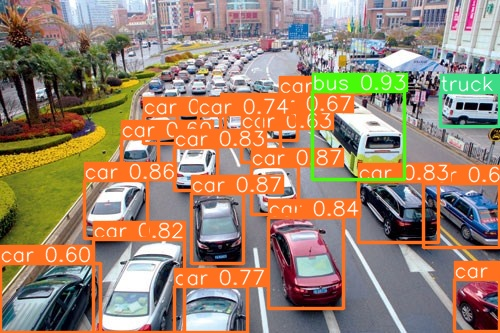

In [ ]:
%cd {HOME}

from IPython.display import Image

Image(filename='/kaggle/working/runs/detect/predict/20160322000524.jpg', height=600)

In [ ]:
!pip install roboflow
!mkdir {HOME}/datasets
%cd {HOME}/datasets

from roboflow import Roboflow
rf = Roboflow(api_key="PgBemLUVP198KdBHye0r")
project = rf.workspace("jui").project("driver-behaviors")
version = project.version(10)
dataset = version.download("yolov8")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 13.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 27.9 MB/s eta 0:00:0000:0100:01m
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.10.0.82
    Uninstalling opencv-python-headless-4.10.0.82:
      Successfully uninstalled opencv-python-headless-4.10.0.82
  Attempting uninstall: idna
    Found existing installation: idna 3.6
    Uninstalling idna-3.6:
      Successfully uninstalled idna-3.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-decision-forests 1.8.1 requires wurlitzer, which is not installed.
jupyterlab 4.2.1 requires jupyter-lsp>=2.0.0, but you 


Extracting Dataset Version Zip to Driver-behaviors-10 in yolov8:: 100%|██████████| 19814/19814 [00:02<00:00, 8915.02it/s] 


In [ ]:
import yaml

# Path to the data.yaml file
file_path = '/kaggle/working/datasets/Driver-behaviors-10/data.yaml'

# Load the YAML file
with open(file_path, 'r') as file:
    data = yaml.safe_load(file)

# Print the current contents of the YAML file (optional)
print("Before editing:", data)

# Update the contents
data = {
    'names': ['cigarette', 'phone', 'seatbelt'],
    'nc': 3,
    'roboflow': {
        'license': 'CC BY 4.0',
        'project': 'driver-behaviors',
        'url': 'https://universe.roboflow.com/jui/driver-behaviors/dataset/10',
        'version': 10,
        'workspace': 'jui'
    },
    'test': '/kaggle/working/datasets/Driver-behaviors-10/test/images',
    'train': '/kaggle/working/datasets/Driver-behaviors-10/train/images',
    'val': '/kaggle/working/datasets/Driver-behaviors-10/valid/images'
}

# Save the changes back to the YAML file
with open(file_path, 'w') as file:
    yaml.safe_dump(data, file)

# Verify the changes
with open(file_path, 'r') as file:
    updated_data = yaml.safe_load(file)
    print("After editing:", updated_data)


Before editing: {'names': ['cigarette', 'phone', 'seatbelt'], 'nc': 3, 'roboflow': {'license': 'CC BY 4.0', 'project': 'driver-behaviors', 'url': 'https://universe.roboflow.com/jui/driver-behaviors/dataset/10', 'version': 10, 'workspace': 'jui'}, 'test': '../test/images', 'train': 'Driver-behaviors-10/train/images', 'val': 'Driver-behaviors-10/valid/images'}
After editing: {'names': ['cigarette', 'phone', 'seatbelt'], 'nc': 3, 'roboflow': {'license': 'CC BY 4.0', 'project': 'driver-behaviors', 'url': 'https://universe.roboflow.com/jui/driver-behaviors/dataset/10', 'version': 10, 'workspace': 'jui'}, 'test': '/kaggle/working/datasets/Driver-behaviors-10/test/images', 'train': '/kaggle/working/datasets/Driver-behaviors-10/train/images', 'val': '/kaggle/working/datasets/Driver-behaviors-10/valid/images'}


In [ ]:
%cd {HOME}
!yolo task=detect mode=train model=yolov10s.pt data=/kaggle/working/datasets/Driver-behaviors-10/data.yaml epochs=100 imgsz=800 plots=True


/kaggle/working
New https://pypi.org/project/ultralytics/8.2.42 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.1.34 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)
engine/trainer: task=detect, mode=train, model=yolov10s.pt, data=/kaggle/working/datasets/Driver-behaviors-10/data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=800, save=True, save_period=-1, val_period=1, cache=False, device=None, workers=8, project=None, name=train6, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False

In [ ]:
import cv2
from ultralytics import YOLOv10
import pandas as pd
import cvzone


model = YOLOv10("/kaggle/working/runs/detect/train6/weights/best.pt")

def RGB(event, x, y, flags, param):
    if event == cv2.EVENT_MOUSEMOVE:
        point = [x, y]
        print(point)

cv2.namedWindow('RGB')
cv2.setMouseCallback('RGB', RGB)

cap=cv2.VideoCapture('drivingrules.mp4')
my_file = open("coco1.txt", "r")
data = my_file.read()
class_list = data.split("\n")


count=0
while True:
    ret,frame = cap.read()
    count += 1
    if count % 3 != 0:
        continue
    if not ret:
       break
    frame = cv2.resize(frame, (1020, 600))

    results = model(frame)
    a = results[0].boxes.data
    px = pd.DataFrame(a).astype("float")

    for index, row in px.iterrows():
        x1 = int(row[0])
        y1 = int(row[1])
        x2 = int(row[2])
        y2 = int(row[3])
        d = int(row[5])
        c = class_list[d]
        cv2.rectangle(frame,(x1,y1),(x2,y2),(0,255,0),2)
        cvzone.putTextRect(frame,f'{c}',(x1,y1),1,1)




    cv2.imshow("RGB", frame)
    # Break the loop if 'q' is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break


cap.release()
cv2.destroyAllWindows()



error: OpenCV(4.10.0) /io/opencv/modules/highgui/src/window.cpp:1284: error: (-2:Unspecified error) The function is not implemented. Rebuild the library with Windows, GTK+ 2.x or Cocoa support. If you are on Ubuntu or Debian, install libgtk2.0-dev and pkg-config, then re-run cmake or configure script in function 'cvNamedWindow'


In [ ]:
!pip install cvzone

  Preparing metadata (setup.py) ... done
  Created wheel for cvzone: filename=cvzone-1.6.1-py3-none-any.whl size=26297 sha256=96df62677ca90d60e3913a5f225dad52deff4a05564b16e7f234e94fe97ea180
  Stored in directory: /root/.cache/pip/wheels/2c/9f/b3/92e945ac4a71bf727a92463f38155cc5a4fa49c5010b38ec4c
Successfully built cvzone
